In [30]:
import numpy as np
import random as r
import cv2
import matplotlib.pyplot as plt
from geopy.distance import geodesic

In [31]:
class Node:
    def __init__(self, idn, x, y):
        self.idn = idn
        self.pos = np.array((float(x), float(y)))

In [32]:

coordinates = np.array([
    [85.35, 27.69],
    [ 83.41, 27.5],
    [84.014, 28.18],
    [85.92, 26.71],
    [81.81, 29.97],
    [80.58, 28.75],
    [81.40, 28.06],
    [86.73, 27.68],
    [82.19, 29.27],
    [87.26, 26.48],
    ])
listcity = ["Tribhuwan", "Buddha", "Pokhara", "Janakpur", "Simikot", "Dhangadhi", "NepaliJung", "TenzingHillary", "Jumla", "Biratnagar"]

numcity = coordinates.shape[0]
bestpath=np.zeros(numcity)
bpath=np.zeros(numcity)
print (numcity)
print(bestpath)
print(bpath)

10
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [33]:
class Bee:
    def __init__(self):
        self.choosen_nodes = []
        self.recuiter = True
        self.distance = 0.0

    def choose_rand_move(self, move, nods):
        # move == the number of city which is  to be choosen randomly
        # nods == the list of node from where the cxity must be choosen
        # choosen node must be unique

        for i in range(move):
            if self.is_complete():
                break
            else:
                sel = nods[r.randint(0, len(nodes) - 1)]
                while sel in self.choosen_nodes:
                    sel = nods[r.randint(0, len(nodes) - 1)]
                self.choosen_nodes.append(sel)

            self.total_distance()

    def change_role(self, role):
        self.recuiter = role

    def replace_nodes(self, nods):
        self.choosen_nodes = nods
        self.total_distance()

    def total_distance(self):
        distance = 0.0
        for i in range(len(self.choosen_nodes) - 1):
            node1 = self.choosen_nodes[i]
            node2 = self.choosen_nodes[i + 1]
            distance += geodesic(node1.pos, node2.pos).miles
        distance += geodesic(self.choosen_nodes[-1].pos, self.choosen_nodes[0].pos).miles
        self.distance = distance

    def is_complete(self):
        if len(self.choosen_nodes) >= len(nodes):
            return True
        else:
            return False

In [34]:
def load_nodes(filename):
    ret = []
    with open(filename) as f:
        nodes_s = f.readlines()
    nodes_s = [x.strip() for x in nodes_s]
    for n in nodes_s:
        node = n.split(' ')
        ret.append(Node(node[0], node[1], node[2]))
    return ret
nodes = load_nodes("data1")
print(nodes)

[<__main__.Node object at 0x7e086175c5d0>, <__main__.Node object at 0x7e086175d750>, <__main__.Node object at 0x7e08619bef90>, <__main__.Node object at 0x7e086175e150>, <__main__.Node object at 0x7e086175fbd0>, <__main__.Node object at 0x7e086175e990>, <__main__.Node object at 0x7e086175e810>, <__main__.Node object at 0x7e086175ee10>, <__main__.Node object at 0x7e086175e590>, <__main__.Node object at 0x7e086193a850>, <__main__.Node object at 0x7e0861880090>]


In [35]:
n_bee = 300  # the more number of bee , there is chance of more optimum answer
n_move = 2

bees = []
best_bee = Bee()
e = 0

for i in range(n_bee):
    bees.append(Bee())

iter=0
dd=10000
bestdd=0
itermax = 50

In [36]:

while iter < itermax:
    print("Iteration ",iter)

    if best_bee.is_complete():
        n_bee = 300
        n_move = 2

        bees = []
        best_bee = Bee()

        e = 0


        for i in range(n_bee):
            bees.append(Bee())

    while not best_bee.is_complete():
        print("\nEpoch", e + 1)

        print("forward pass")

        for bee in bees:
            bee.choose_rand_move(n_move, nodes)


        print("evaluating")
        bees = sorted(bees, key=lambda be: be.distance, reverse=False)
        best_bee = bees[0]

        print("Best distance so far", best_bee.distance)
        print("Best route so far", [n.idn for n in best_bee.choosen_nodes])

        bpath = [int(item) for item in [n.idn for n in best_bee.choosen_nodes]]
        bestdd=best_bee.distance

        print("Bees are making decision to be recruiter or follower")
        Cmax = max(bees, key=lambda b: b.distance).distance
        Cmin = min(bees, key=lambda b: b.distance).distance

        recruiters = []

        for bee in bees:
            Ob = (Cmax - bee.distance) / (Cmax - Cmin)  # this has of range [0,1]
            probs = np.e ** (-(1 - Ob) / (len(bee.choosen_nodes) * 0.01))
            rndm = r.uniform(0, 1)
            if rndm < probs:
                bee.change_role(True)
                recruiters.append(bee)
            else:
                bee.change_role(False)

        print("number of recruiter ", len(recruiters))


        divider = sum([(Cmax - bee.distance) / (Cmax - Cmin) for bee in recruiters])
        probs = [((Cmax - bee.distance) / (Cmax - Cmin)) / divider for bee in recruiters]
        cumulative_probs = [sum(probs[:x + 1]) for x in range(len(probs))]

        for bee in bees:
            if not bee.recuiter:
                rndm = r.uniform(0, 1)
                selected_bee = Bee()
                for i, cp in enumerate(cumulative_probs):
                    if rndm < cp:
                        selected_bee = recruiters[i]
                        break
                bee.replace_nodes(selected_bee.choosen_nodes[:])
        e += 1


    if dd > bestdd:
        dd = bestdd
        bestpath = bpath
        it=iter

    iter=iter+1


Iteration  0

Epoch 1
forward pass
evaluating
Best distance so far 9.008959219188359
Best route so far ['8', '11']
Bees are making decision to be recruiter or follower
number of recruiter  5

Epoch 2
forward pass
evaluating
Best distance so far 186.7646604404513
Best route so far ['11', '8', '10', '4']
Bees are making decision to be recruiter or follower
number of recruiter  13

Epoch 3
forward pass
evaluating
Best distance so far 459.49049154349115
Best route so far ['8', '11', '10', '1', '3', '4']
Bees are making decision to be recruiter or follower
number of recruiter  13

Epoch 4
forward pass
evaluating
Best distance so far 686.1389959325504
Best route so far ['8', '11', '4', '1', '3', '2', '9', '5']
Bees are making decision to be recruiter or follower
number of recruiter  14

Epoch 5
forward pass
evaluating
Best distance so far 822.6186904723137
Best route so far ['8', '11', '4', '1', '3', '2', '9', '5', '7', '10']
Bees are making decision to be recruiter or follower
number of rec

In [37]:
print(it)
print(bestpath)

8
[11, 8, 10, 4, 1, 3, 9, 5, 6, 7, 2]


Starting Bee Colony Simulation (First Iteration)...


------------------ Epoch 2 ------------------

Bee 1 before move: Path = None | Distance = 0.00 miles
    Bee 1 chose city 5 (Simikot)
    Bee 1 chose city 2 (Buddha)
Bee 1 after move:  Path = 5(Simikot) -> 2(Buddha) | Distance = 195.87 miles

Bee 2 before move: Path = None | Distance = 0.00 miles
    Bee 2 chose city 2 (Buddha)
    Bee 2 chose city 6 (Dhangadhi)
Bee 2 after move:  Path = 2(Buddha) -> 6(Dhangadhi) | Distance = 193.01 miles

Bee 3 before move: Path = None | Distance = 0.00 miles
    Bee 3 chose city 5 (Simikot)
    Bee 3 chose city 1 (Tribhuwan)
Bee 3 after move:  Path = 5(Simikot) -> 1(Tribhuwan) | Distance = 265.95 miles

Bee 4 before move: Path = None | Distance = 0.00 miles
    Bee 4 chose city 1 (Tribhuwan)
    Bee 4 chose city 2 (Buddha)
Bee 4 after move:  Path = 1(Tribhuwan) -> 2(Buddha) | Distance = 119.73 miles

Bee 5 before move: Path = None | Distance = 0.00 miles
    Bee 5 chose city 1 (Tribhuwan)
    Bee

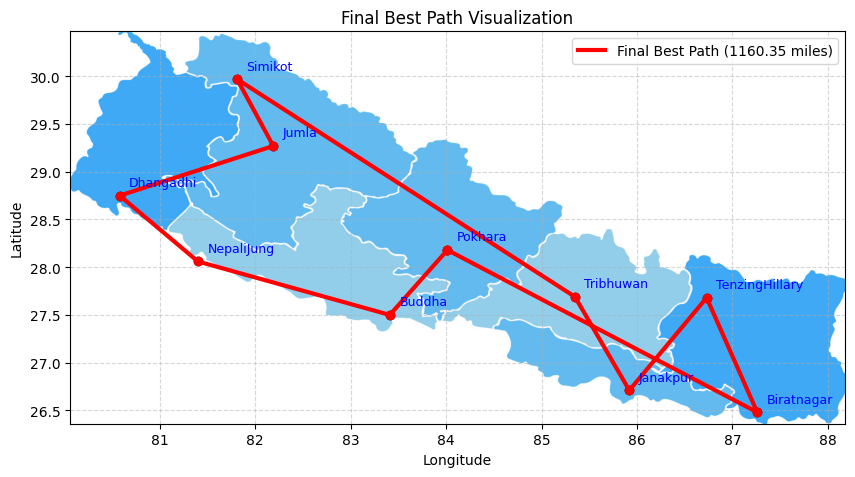

In [28]:
#consize form of above just to see what is happening in each epoch of iteration

class Node:
    def __init__(self, idn, lon, lat):
        self.idn = idn
        self.pos = (lat, lon)

nodes = [Node(i+1, coordinates[i, 0], coordinates[i, 1]) for i in range(len(listcity))]


class Bee:
    def __init__(self, bee_id):
        self.bee_id = bee_id
        self.choosen_nodes = []
        self.distance = 0.0
        self.is_recruiter = None
        self.following = None

    def choose_rand_move(self, available_nodes, move=1):
        for _ in range(move):
            if self.is_complete():
                break

            options = [node for node in available_nodes if node not in self.choosen_nodes]
            if not options:
                break
            selected = r.choice(options)
            self.choosen_nodes.append(selected)
            self.compute_total_distance()
            print(f"    Bee {self.bee_id} chose city {selected.idn} ({listcity[selected.idn - 1]})")

    def compute_total_distance(self):
        if len(self.choosen_nodes) < 2:
            self.distance = 0.0
            return
        dist = 0.0
        for i in range(len(self.choosen_nodes) - 1):
            n1 = self.choosen_nodes[i]
            n2 = self.choosen_nodes[i+1]
            dist += geodesic(n1.pos, n2.pos).miles
        self.distance = dist

    def is_complete(self):
        return len(self.choosen_nodes) == len(nodes)

    def copy_path(self, other_path):
        self.choosen_nodes = other_path.copy()
        self.compute_total_distance()

    def print_path(self):
        if not self.choosen_nodes:
            return "None"
        return " -> ".join([f"{node.idn}({listcity[node.idn - 1]})" for node in self.choosen_nodes])


n_bee = 100
n_move = 2

bees = [Bee(i+1) for i in range(n_bee)]

epoch = 1
best_bee = None

print("Starting Bee Colony Simulation (First Iteration)...\n")

while True:
    epoch += 1
    print(f"\n------------------ Epoch {epoch} ------------------")
    for bee in bees:
        print(f"\nBee {bee.bee_id} before move: Path = {bee.print_path()} | Distance = {bee.distance:.2f} miles")
        bee.choose_rand_move(nodes, move=n_move)
        print(f"Bee {bee.bee_id} after move:  Path = {bee.print_path()} | Distance = {bee.distance:.2f} miles")


    bees_with_path = [bee for bee in bees if bee.choosen_nodes]
    if bees_with_path:
        best_bee = min(bees_with_path, key=lambda b: b.distance)
        print(f"\nCurrent best bee is Bee {best_bee.bee_id} with path: {best_bee.print_path()} and distance: {best_bee.distance:.2f} miles")

    if bees_with_path:
        Cmax = max(bees_with_path, key=lambda b: b.distance).distance
        Cmin = min(bees_with_path, key=lambda b: b.distance).distance
    else:
        Cmax, Cmin = 0, 0

    recruiters = []
    print("\nRole Assignment:")
    for bee in bees:
        if not bee.choosen_nodes:
            continue

        if Cmax == Cmin:
            Ob = 1.0
        else:
            Ob = (Cmax - bee.distance) / (Cmax - Cmin)

        prob = np.exp(-(1 - Ob) / (len(bee.choosen_nodes) * 0.01)) if len(bee.choosen_nodes) > 0 else 0
        rnd = r.uniform(0, 1)
        if rnd < prob:
            bee.is_recruiter = True
            recruiters.append(bee)
        else:
            bee.is_recruiter = False
        role = "Recruiter" if bee.is_recruiter else "Follower"
        print(f"  Bee {bee.bee_id}: Distance = {bee.distance:.2f}, Ob = {Ob:.2f}, Prob = {prob:.4f}, Random = {rnd:.4f} -> {role}")


    if recruiters:
        divider = sum(((Cmax - bee.distance) / (Cmax - Cmin) if Cmax != Cmin else 1.0) for bee in recruiters)
        cumulative_probs = []
        running_sum = 0.0
        for bee in recruiters:
            p_val = (((Cmax - bee.distance) / (Cmax - Cmin) if Cmax != Cmin else 1.0) / divider) if divider != 0 else 0
            running_sum += p_val
            cumulative_probs.append(running_sum)
        for bee in bees:
            if bee.is_recruiter is False:
                rnd_select = r.uniform(0, 1)
                selected_recruiter = None
                for i, cp in enumerate(cumulative_probs):
                    if rnd_select < cp:
                        selected_recruiter = recruiters[i]
                        break
                if selected_recruiter:
                    bee.following = selected_recruiter.bee_id
                    bee.copy_path(selected_recruiter.choosen_nodes)
                    print(f"  Bee {bee.bee_id} (Follower) follows Bee {selected_recruiter.bee_id}'s path: {bee.print_path()}")
                else:
                    print(f"  Bee {bee.bee_id} (Follower) did not select any recruiter.")

    if best_bee and best_bee.is_complete():
        closing_leg = geodesic(best_bee.choosen_nodes[-1].pos, best_bee.choosen_nodes[0].pos).miles
        total_complete_distance = best_bee.distance + closing_leg
        print(f"\n>>> Bee {best_bee.bee_id} has completed its tour!")
        print(f"Final path: {best_bee.print_path()} -> {best_bee.choosen_nodes[0].idn}({listcity[best_bee.choosen_nodes[0].idn - 1]})")
        print(f"Total complete distance (including return leg): {total_complete_distance:.2f} miles")
        break

print("\n--- End of First Iteration ---\n")


try:
    bg_img = plt.imread('Vector.jpg')
    bg_extent = [80.06, 88.18, 26.36, 30.47]
except Exception as e:
    print("Background image not found; proceeding without it.")
    bg_img = None
    bg_extent = [80.06, 88.18, 26.36, 30.47]

fig, ax = plt.subplots(figsize=(10, 8))
if bg_img is not None:
    ax.imshow(bg_img, extent=bg_extent)

for node in nodes:
    ax.plot(node.pos[1], node.pos[0], 'ko', markersize=6)
    ax.text(node.pos[1] + 0.1, node.pos[0] + 0.1, listcity[node.idn - 1], fontsize=9, color='blue')

best_lons = [node.pos[1] for node in best_bee.choosen_nodes]
best_lats = [node.pos[0] for node in best_bee.choosen_nodes]


best_lons.append(best_lons[0])
best_lats.append(best_lats[0])
ax.plot(best_lons, best_lats, 'r-', linewidth=3, label=f"Final Best Path ({total_complete_distance:.2f} miles)")
ax.plot(best_lons, best_lats, 'ro', markersize=6)
ax.legend()
ax.set_xlim(bg_extent[0], bg_extent[1])
ax.set_ylim(bg_extent[2], bg_extent[3])
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Final Best Path Visualization")
ax.grid(True, linestyle='--', alpha=0.5)
plt.savefig("final_best_path.png", dpi=300, bbox_inches='tight')
plt.show()
